# Import Necessary Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading CSV File

In [47]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [48]:
# rename all the columns
df.columns=["State","date","frequency","Estimated Unemployment Rate","Estimated employed","Estimated Labour Participation Rate","Region","Longitude","Latitude"]

In [49]:
# return first five entries
df.head()

,State,date,frequency,Estimated Unemployment Rate,Estimated employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [50]:
# extracting number of rows and columns
df.shape

(267, 9)

In [51]:
# return numerical description of the data
df.describe()

,Estimated Unemployment Rate,Estimated employed,Estimated Labour Participation Rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


# Encoding the Categorical data

In [52]:
df.replace({"Region":{"North":1,"South":2,"West":3 ,"East":4,"Northeast":5}},inplace=True)
df.drop("frequency",axis=1,inplace=True)

In [53]:
df.head()

,State,date,Estimated Unemployment Rate,Estimated employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,2,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,2,15.9129,79.74
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,2,15.9129,79.74
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,2,15.9129,79.74
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,2,15.9129,79.74


In [54]:
# Checking the number of missing values
df.isnull().sum()

State                                  0
date                                   0
Estimated Unemployment Rate            0
Estimated employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

# Splitting the Date column 

In [55]:
df["date"]=pd.to_datetime(df["date"])
df['month'] = df['date'].dt.month

In [56]:
df

,State,date,Estimated Unemployment Rate,Estimated employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,2,15.9129,79.740,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,2,15.9129,79.740,2
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,2,15.9129,79.740,3
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,2,15.9129,79.740,4
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,2,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,4,22.9868,87.855,6
263,West Bengal,2020-07-31,6.83,35372506,46.17,4,22.9868,87.855,7
264,West Bengal,2020-08-31,14.87,33298644,47.48,4,22.9868,87.855,8
265,West Bengal,2020-09-30,9.35,35707239,47.73,4,22.9868,87.855,9


# Visualizing the Unemployment rate  of particular state month wise

Enter a state: West Bengal


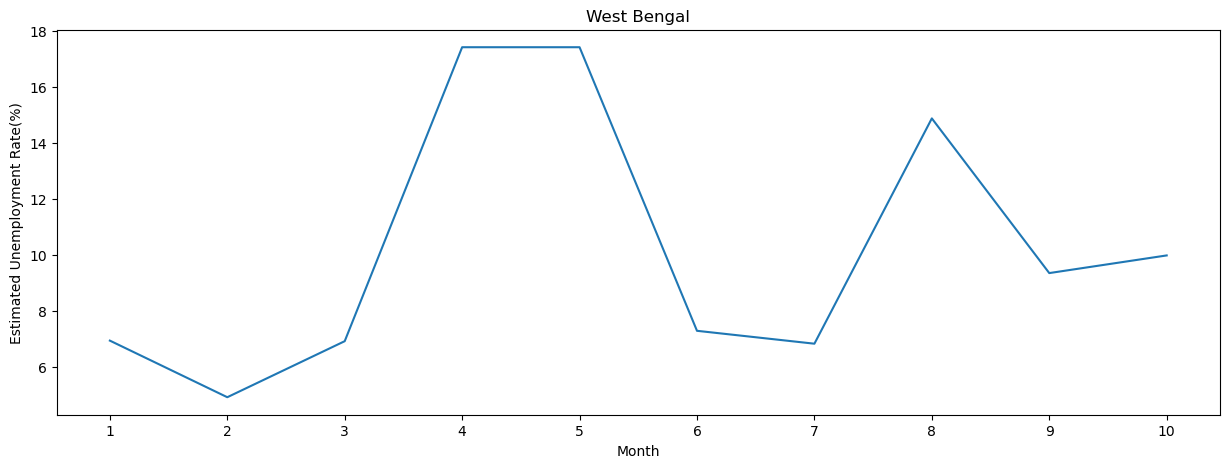

In [61]:
st=input("Enter a state:")
df1=df[df["State"]==st][["month","Estimated Unemployment Rate"]]
plt.figure(figsize=(15, 5))
plt.plot(df1["month"],df1["Estimated Unemployment Rate"])
plt.xticks(np.arange(1, 11, step=1))
plt.title(st)
plt.xlabel("Month")
plt.ylabel("Estimated Unemployment Rate(%)")
plt.show()

# Visualizing the Unemployment rate of each State in a particular month

Enter a Month Number : 5


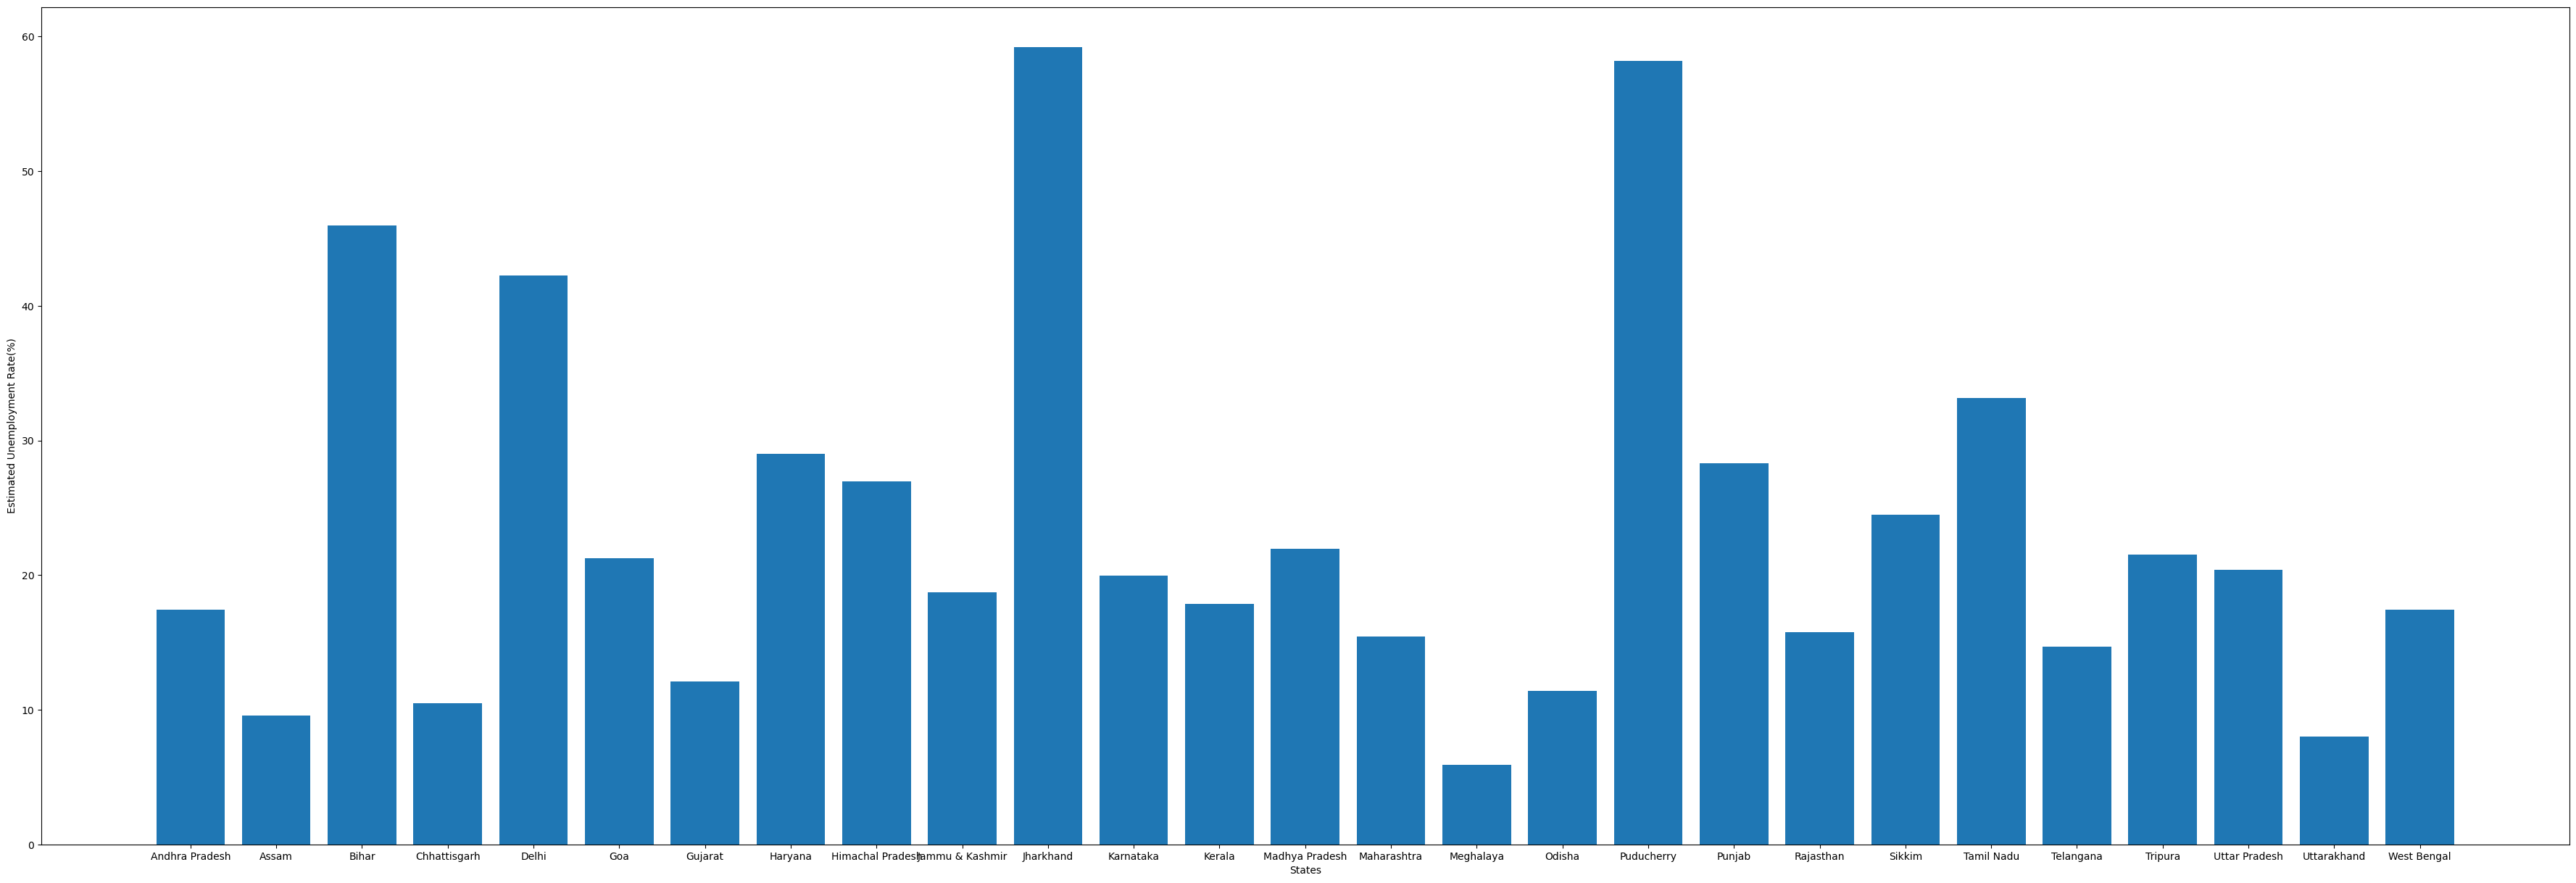

In [62]:
mon=int(input("Enter a Month Number :"))
Y=df[df["month"]==mon][["State","Estimated Unemployment Rate"]]
plt.figure(figsize=(45, 15))
plt.bar(Y["State"],Y["Estimated Unemployment Rate"])
plt.xlabel("States")
plt.ylabel("Estimated Unemployment Rate(%)")
plt.show()